# Análisis Exploratorio de Datos con R
El presente cuaderno muestra las principales operaciones de *data wrangling* (manejo de dataframes), así como el cálculo de estadísticos descriptivos y la visualización de gráficos básicos, es decir, las operaciones que componen un análisis exploratorio de datos clásico.

### Datos:

In [ ]:
set.seed(2021) #Establecemos una semilla para facilitar la reproductibilidad de los resultados
#Creamos un dataset con una columna de IDs, tres variables continuas (altura, sexo y edad) y una categórica (sexo), y 250 observaciones:
datos1 <- data.frame(
  ID = seq(from=1, to=250), #Los IDs serán los números entre 1 y 250
  Sexo = sample(c("Hombre", "Mujer"), 250, replace=TRUE), #Seleccionamos al azar, 250 veces, entre las categorías Hombre y Mujer
  Altura = abs(rnorm(n=250, mean=165, sd=30)), #La altura sigue una normal N(165, 30). Usamos la función abs() (valor absoluto), para evitar alturas negativas
  Peso = abs(rnorm(250, 65, 30)),  #El peso sigue una normal N(65, 30). Usamos la función abs(), para evitar pesos negativos
  Edad = abs(rnorm(250, 30, 15)) #La edad sigue una normal N(30, 15). Usamos la función abs(), para evitar edades negativas
)
head(datos1)
print("------------------------------------")
datos2 <- data.frame(
  ID = seq(251, 300), #Los IDs serán los números entre 251 y 300
  Sexo = sample(c("Hombre", "Mujer"), 50, replace=TRUE),
  Altura = abs(rnorm(50, 165, 30)),
  Peso = abs(rnorm(50, 65, 30)), 
  Edad = abs(rnorm(50, 30, 15))
)
head(datos2)
print("------------------------------------")
datos3 = data.frame(
  ID = seq(1, 300),
  Ingresos = abs(rnorm(300, 15000, 10000)), #Los ingresos siguen una normal N(15000, 10000). Usamos la función abs(), para evitar ingresos negativos
  Estatus_laboral = sample(c("Parado", "Ocupado"), 300, replace=TRUE)
)
head(datos3)

,ID,Sexo,Altura,Peso,Edad
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1,Hombre,179.5427,85.87924,23.27393
2,2,Mujer,197.7971,44.83243,21.00840
3,3,Mujer,174.0873,104.68984,28.80731
4,4,Mujer,195.4590,54.57712,40.94170
5,5,Hombre,238.6078,49.07498,20.57456
6,6,Mujer,157.6314,87.02069,24.39422


[1] "------------------------------------"


,ID,Sexo,Altura,Peso,Edad
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,251,Mujer,136.2049,54.75811,42.14393
2,252,Hombre,191.3685,66.73241,31.49124
3,253,Hombre,185.2810,39.54589,5.14532
4,254,Hombre,196.2788,38.45122,40.14789
5,255,Hombre,191.7621,53.22663,24.17211
6,256,Hombre,201.5181,91.34500,27.53748


[1] "------------------------------------"


,ID,Ingresos,Estatus_laboral
,<int>,<dbl>,<chr>
1,1,6044.306,Ocupado
2,2,7623.003,Parado
3,3,22356.377,Parado
4,4,5193.577,Parado
5,5,15694.739,Ocupado
6,6,18021.648,Ocupado


### Concatenación de datasets:
Vamos a unir verticalmente (uno debajo del otro) los datasets datos1 y datos2

In [ ]:
datos_1_2 = rbind(datos1, datos2)
nrow(datos_1_2) #Comprobamos que la longitud del nuevo dataset es de 300

[1] 300

### Unión (*join*) de datasets:
Vamos a unir el anterior dataset *datos_1_2* con el dataset *datos3* horizontalmente (columnas al lado de columnas), usando la columna de IDs como nexo de unión.

In [ ]:
datos_final = merge(x=datos_1_2, y=datos3, by="ID")
nrow(datos_final)
head(datos_final) #Comprobamos que tenemos 300 observaciones y todas las columnas

[1] 300

,ID,Sexo,Altura,Peso,Edad,Ingresos,Estatus_laboral
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,Hombre,179.5427,85.87924,23.27393,6044.306,Ocupado
2,2,Mujer,197.7971,44.83243,21.00840,7623.003,Parado
3,3,Mujer,174.0873,104.68984,28.80731,22356.377,Parado
4,4,Mujer,195.4590,54.57712,40.94170,5193.577,Parado
5,5,Hombre,238.6078,49.07498,20.57456,15694.739,Ocupado
6,6,Mujer,157.6314,87.02069,24.39422,18021.648,Ocupado


### Cambiar nombre de filas y columnas del dataframe:
Como tenemos una columna de IDs identificativa de cada una de las 300 observaciones, vamos a cambiar el nombre de las filas (números del 0 al 299), por los valores de la columna ID (números del 1 al 300):


In [ ]:
rownames(datos_final) <- datos_final$ID #Renombramos el índice de las filas con los valores de la columna ID
#Eliminamos la columna ID, ya que no nos hace falta:
datos_final$ID <- NULL
#Cambiamos el nombre de la columna Ingresos por "Ingresos mensuales" (usamos la librería reshape):
#install.packages("reshape") #Solo debemos instalar el paquete en una ocasión, y luego hacer la llamada cada vez que en cada que utilicemos la librería en una sesión
library(reshape)
datos_final = rename(datos_final, Ingresos_mensuales=Ingresos)
head(datos_final)

,Sexo,Altura,Peso,Edad,Ingresos_mensuales,Estatus_laboral
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Hombre,179.5427,85.87924,23.27393,6044.306,Ocupado
2,Mujer,197.7971,44.83243,21.00840,7623.003,Parado
3,Mujer,174.0873,104.68984,28.80731,22356.377,Parado
4,Mujer,195.4590,54.57712,40.94170,5193.577,Parado
5,Hombre,238.6078,49.07498,20.57456,15694.739,Ocupado
6,Mujer,157.6314,87.02069,24.39422,18021.648,Ocupado


### Función summary():
Con las función summary() podemos obtener los estadísticos descriptivos básicos de forma muy rápida.

En el caso de las variables continuas nos da la media, la mediana, el máximo, el mínimo y los cuartiles.

En el caso de las categóricas, nos da el recuento y el tipo de dato.

In [ ]:
summary(datos_final)

     Sexo               Altura            Peso              Edad        
 Length:300         Min.   : 84.51   Min.   :  3.716   Min.   : 0.4809  
 Class :character   1st Qu.:142.13   1st Qu.: 42.616   1st Qu.:20.7226  
 Mode  :character   Median :165.64   Median : 66.298   Median :30.8482  
                    Mean   :164.41   Mean   : 66.023   Mean   :31.6817  
                    3rd Qu.:182.81   3rd Qu.: 89.334   3rd Qu.:41.6027  
                    Max.   :245.00   Max.   :159.313   Max.   :82.3450  
 Ingresos_mensuales Estatus_laboral   
 Min.   :   11.32   Length:300        
 1st Qu.: 8510.80   Class :character  
 Median :15906.69   Mode  :character  
 Mean   :15800.32                     
 3rd Qu.:21564.68                     
 Max.   :41970.92                     

### El paquete *dplyr*:
*dplyr* es el paquete de R por excelencia para hacer operaciones de manejo de datasets. Veamos las principales:

In [ ]:
#install.packages("dplyr")
library(dplyr)
#Este paquete permite la utilización del comando pipe (%>%), que significa algo así como "entonces"
#Extracción de una o varias columnas: funciín select(). Ejemplo: creamos un dataset con las columnas Altura, Peso y Edad
subconjunto1 <- select(datos_final, Altura, Peso, Edad)
subconjunto1 <- datos_final %>% select(Altura, Peso, Edad) #Al usar el comando %>% se leería de la siguiente manera: dado datos_final entonces seleccionada las columnas Altura, Peso y Edad
#Extracción de una o varias filas: función filter(). Ejemplo: extraemos las filas con altura superior a 200 cm:
subconjunto2 <- datos_final %>% filter(Altura > 200)
#Agrupación de los datos en función de las categorías de cierta variable: funcion group_by()
#Esta función suele usarse en combinación con la función summarize(), que permite realizar cálculos sobre los grupos creados con group_by()
#Ejemplo: calculamos la media, mediana, varianza y desviación típica de los ingresos de por sexo:
subconjunto3 <- datos_final %>%
                group_by(Sexo) %>%
                summarize(media = mean(Ingresos_mensuales),
                          mediana = median(Ingresos_mensuales),
                          varianza = var(Ingresos_mensuales),
                          desv_tipica = sd(Ingresos_mensuales))
subconjunto3
#Creacion de nuevas columnas: funcion mutate(). Ejemplo: sobre el dataset original creamos una nueva columna que muestre la altura en metros:
subconjunto4 <- datos_final %>% mutate(Altura_metros=Altura/100)

Sexo,media,mediana,varianza,desv_tipica
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Hombre,15598.8,16189.32,83203170,9121.577
Mujer,16071.1,15483.06,84127784,9172.120


### Filtrado de datos en función de ciertas condiciones:

In [ ]:
#Extraemos las filas 1, 5 y 7, y todas las columnas:
filtrado1 = datos_final[c(1,5,7), ]
#Extraemos las columnas 1, 3 y 6, y todas las filas:
filtrado2 = datos_final[ ,c(1,3,6)]
#Extraemos las filas 100 a 200 y las columnas Sexo a Peso (posiciones 1 a 3). Dos formas:
filtrado3 = datos_final[100:200, 1:3]
filtrado3 = datos_final[100:200, c("Sexo", "Altura", "Peso")]
#Quitamos las filas 38 a 49 y las columnas Sexo e Ingresos_mensuales. Dos formas:
filtrado4 = datos_final[-c(38:49), -c(1, 5)]
filtrado4 = datos_final[-c(38:49), !names(datos_final) %in% c("Sexo", "Ingresos_mensuales")] #No podemos usar el - con los nombres de las columnas. Estamos diciendo que nos coja las columnas con nombre diferente (operador !) a los indicados
#Extraemos todas las observaciones con unos ingresos mensuales inferiores a 5000:
filtrado5 = datos_final[datos_final$Ingresos_mensuales < 5000, ]
#Extraemos las observaciones con una altura superior a 180 cm y un peso superior a 80 kg:
filtrado6 = datos_final[datos_final$Altura > 180 & datos_final$Peso > 80, ]
#Extraemos las observaciones cuya altura sea inferior a 100 cm o su peso inferio a 45 kg:
filtrado7 = datos_final[datos_final$Altura < 100 | datos_final$Peso < 45, ]
#Extraemos las observaciones cuya altura en cm sea inferior a su peso en kg:
filtrado8 = datos_final[datos_final$Altura < datos_final$Peso, ]
#También podemos hacer uso de la función subset() para extraer subconjuntos de datos:
filtrado9 = subset(datos_final, Altura > 200 & Edad < 30, select = c("Edad", "Peso", "Estatus_laboral"))
#Primero debemos filtrar las filas y luego, con select(), las columnas (si se quieren extraer todas las columnas, se omite el select())

### Histograma:

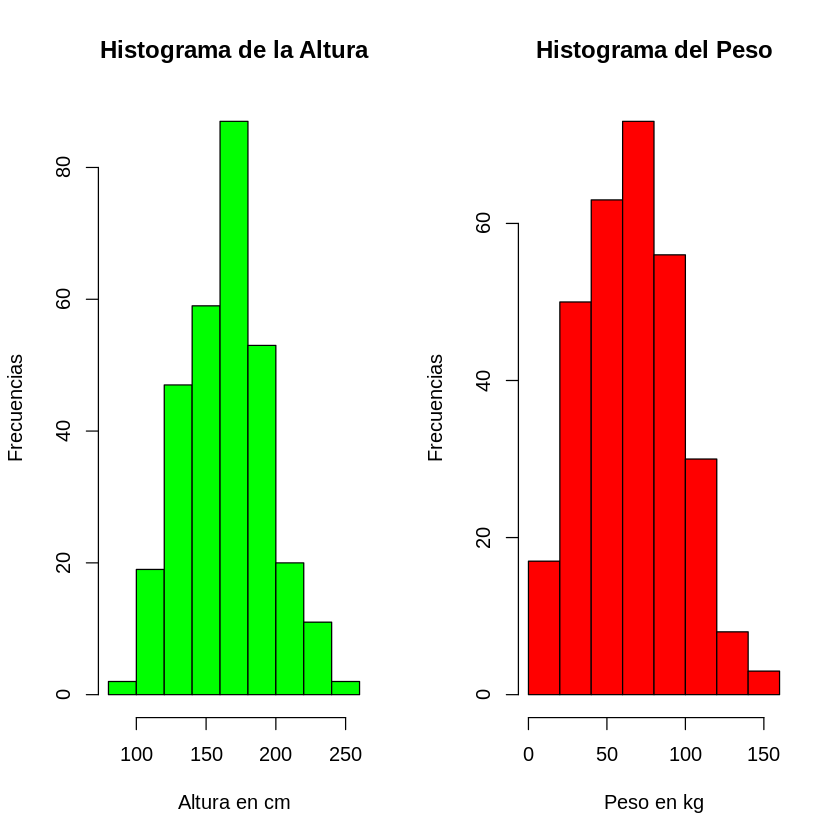

In [ ]:
#Vamos a graficar el histograma para la altura y el peso, usando el subconjunto de datos anterior:
k = 1+log2(nrow(datos_final)) #Regla de Sturges para determinar el número óptimo de barras del histograma: k = 1+ log_2(n). n es el número de observaciones
par(mfrow = c(1,2)) #Para poner dos gráficos uno al lado del otro:
hist(datos_final$Altura, col = "green",
     xlab = "Altura en cm", ylab = "Frecuencias",
     breaks = k, main = "Histograma de la Altura")
hist(datos_final$Peso, col = "red",
     xlab = "Peso en kg", ylab = "Frecuencias",
     breaks = k, main = "Histograma del Peso")

###  Correlación entre variables y diagrama de dispersión (*scatter plot*):

[1] 0.03233157

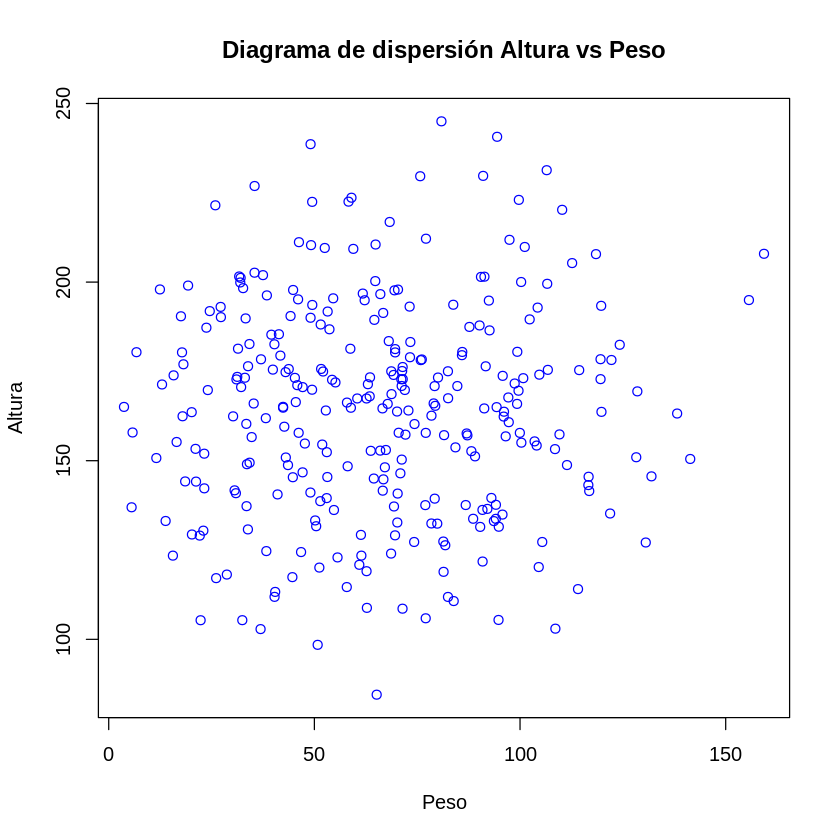

In [ ]:
#Calculamos la correlación entre la altura y el peso:
cor(datos_final$Altura, datos_final$Peso) #Vemos que la correlación es realmente baja (algo que no tiene sentido, pero que está producido porque los números son aleatorios)
#Comprobamos con un diagrama de dispersión que no se aprecia recta de regresión ninguna:
plot(datos_final$Altura ~ datos_final$Peso, col = "blue",
    xlab="Peso", ylab="Altura", main="Diagrama de dispersión Altura vs Peso")

### Diagrama de caja y bigotes (*box-plot*):
Este tipo de gráfico resumen mucha información en poco espacio, siendo muy útil para la detección de outliers.

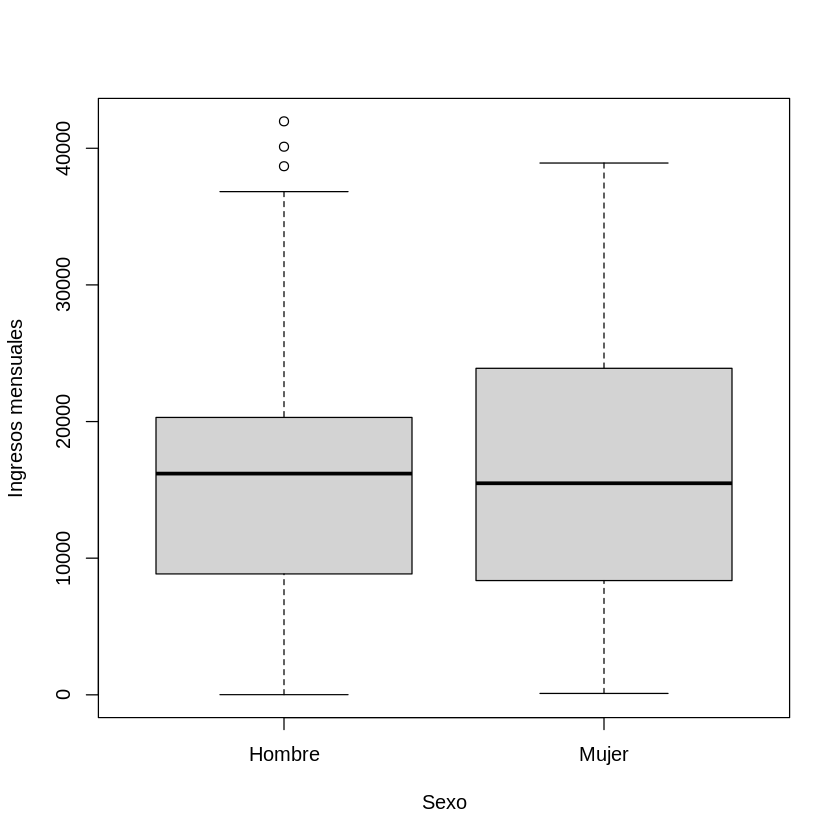

In [ ]:
#Hacemos el box-plot de los ingresos por sexo
boxplot(datos_final$Ingresos_mensuales ~ datos_final$Sexo,
        ylab="Ingresos mensuales", xlab="Sexo")
#La ralla negrita es la mediana
#Los circulitos por encima del box-plot de los hombres son outliers